<a href="https://colab.research.google.com/github/VarizkyNaldiba/ML_Ganjil_2025/blob/main/TG4_2341720243_VARIZKY_NALDIBA_RIMRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# import googledrive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum 1


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah/csv - csvan/Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X= data.iloc[:, 1:-1]
Y= data.iloc[:, -1]


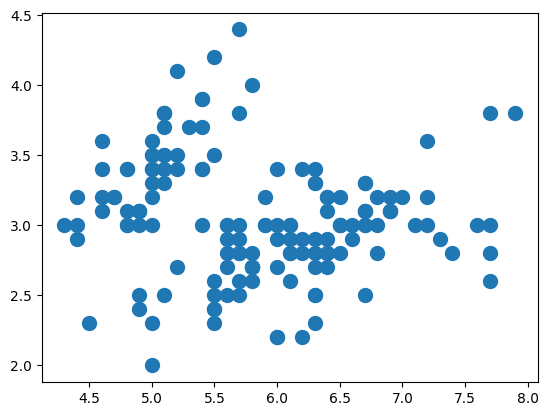

In [ ]:
  # Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

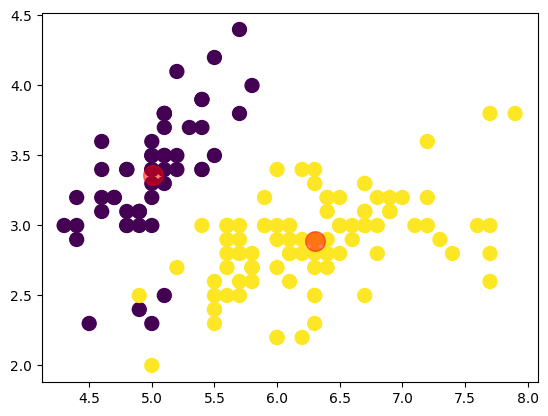

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


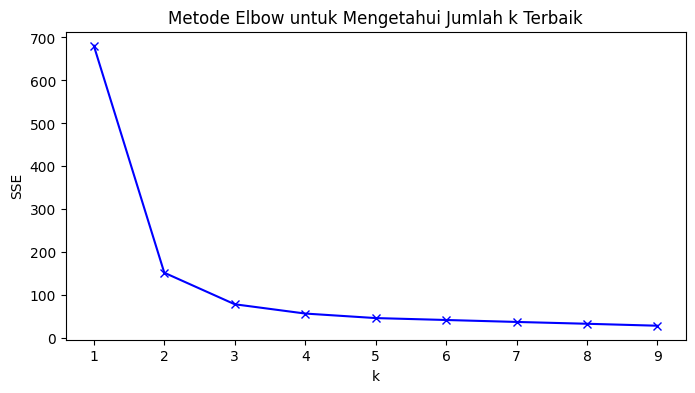

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.34540931571815
k=5; SSE=46.80170193050192
k=6; SSE=42.34889568764569
k=7; SSE=37.81202938205586
k=8; SSE=33.55843288288287
k=9; SSE=29.00296202816791


# Praktikum 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

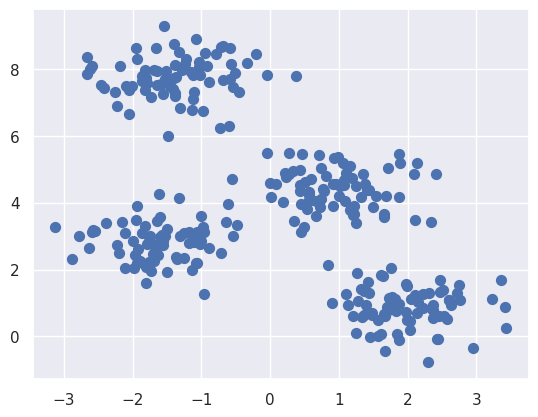

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

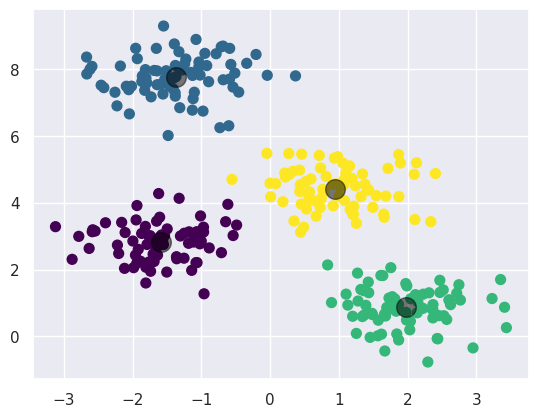

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

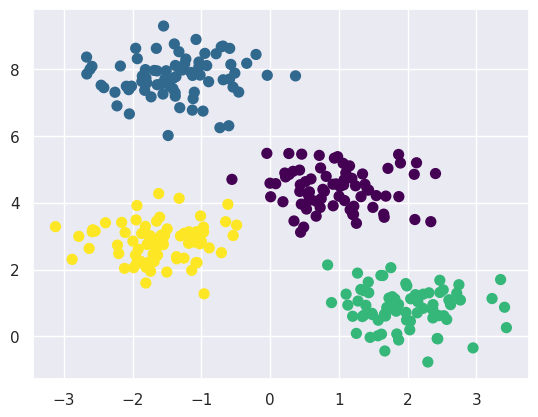

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

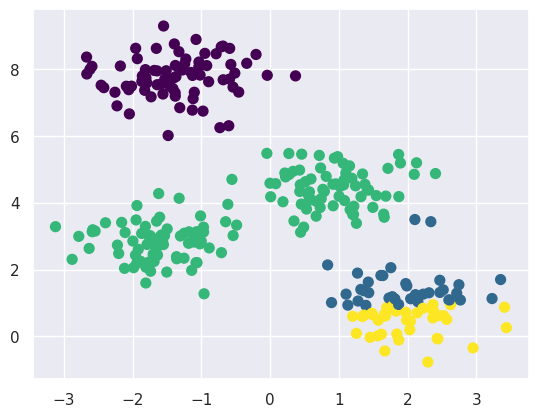

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

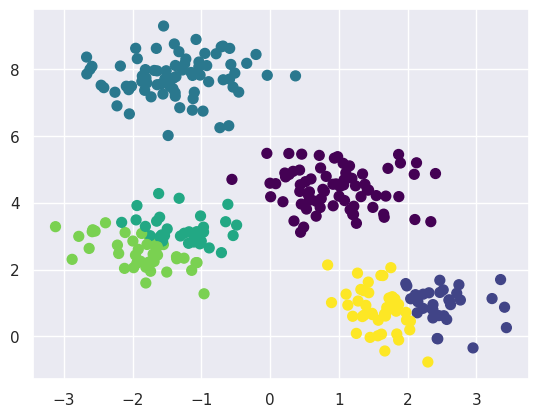

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

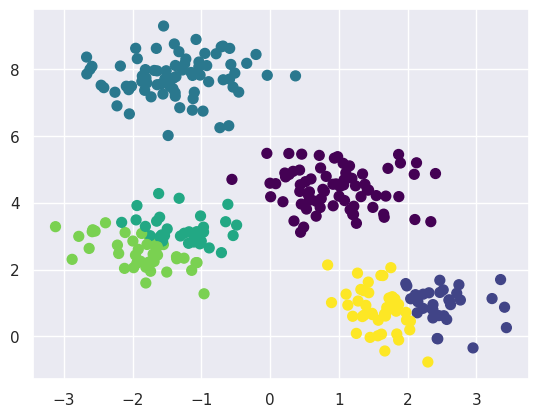

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

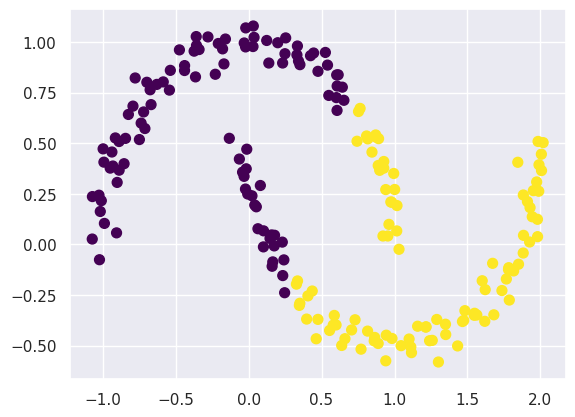

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


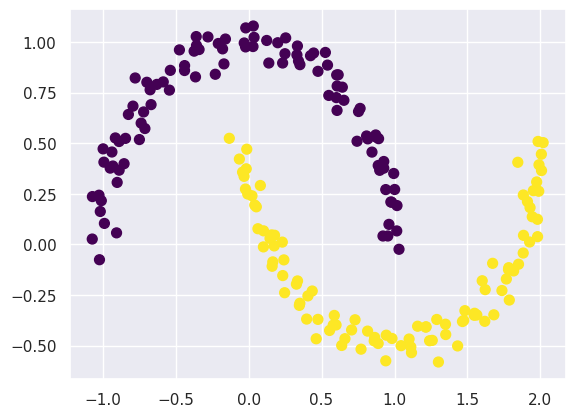

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh Kasus1 : Karakter Angka


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

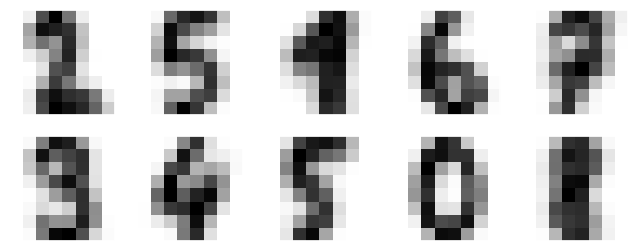

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

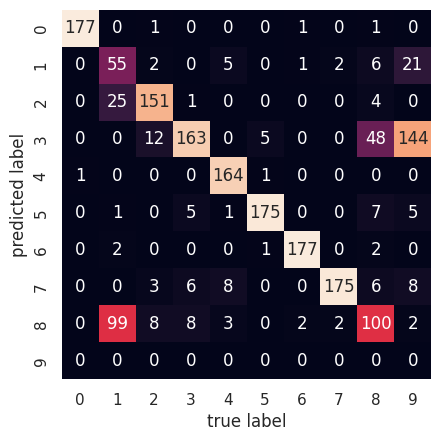

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

## Studi Kasus 2: Kompresi Citra

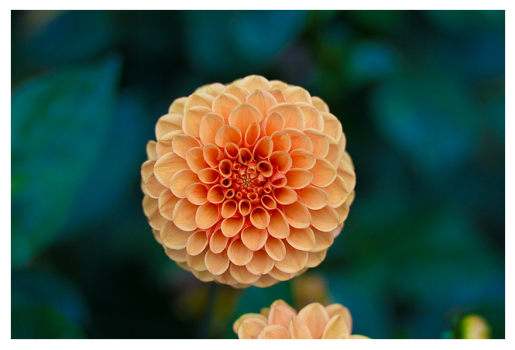

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

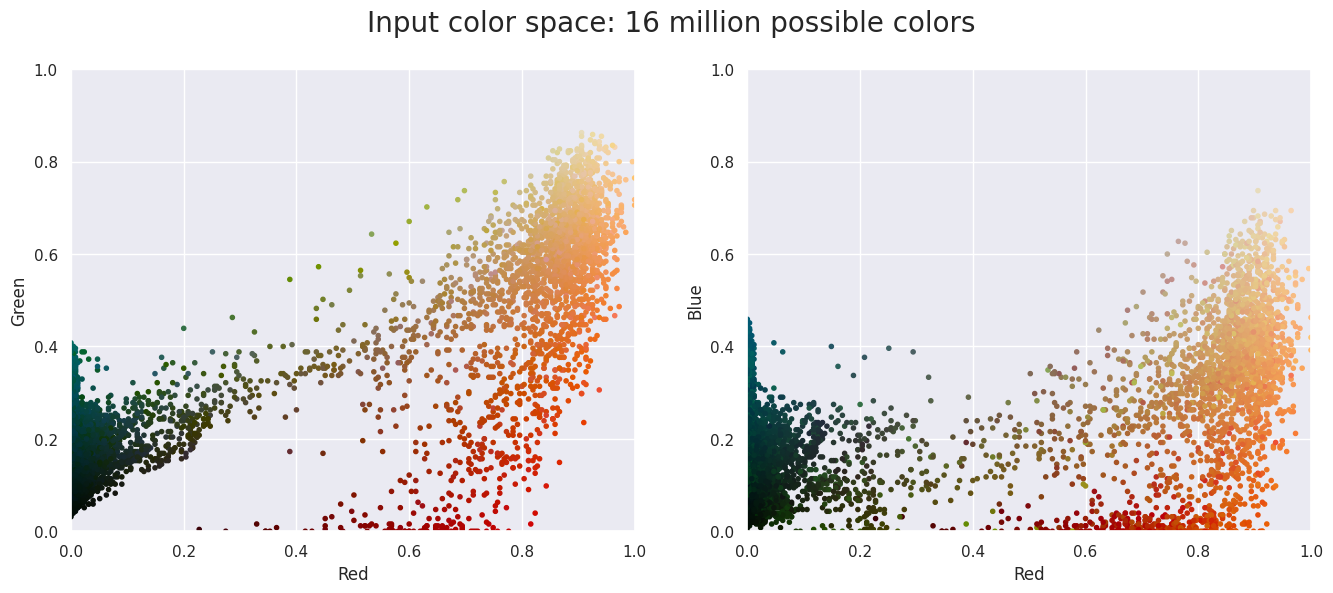

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

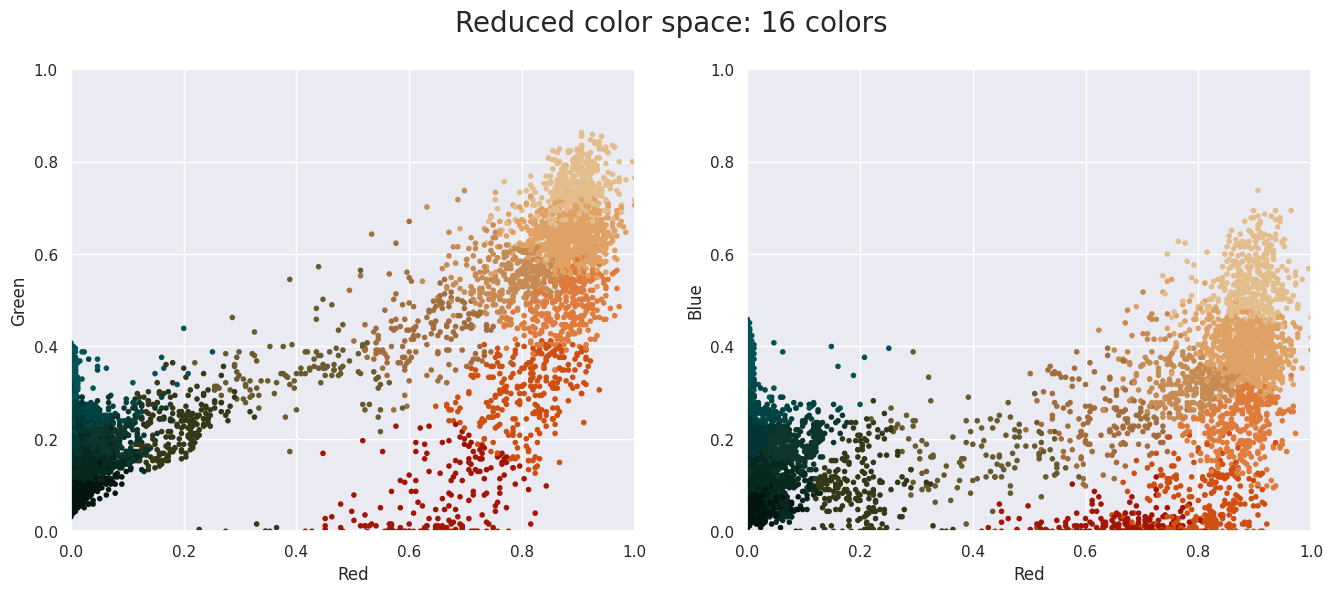

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

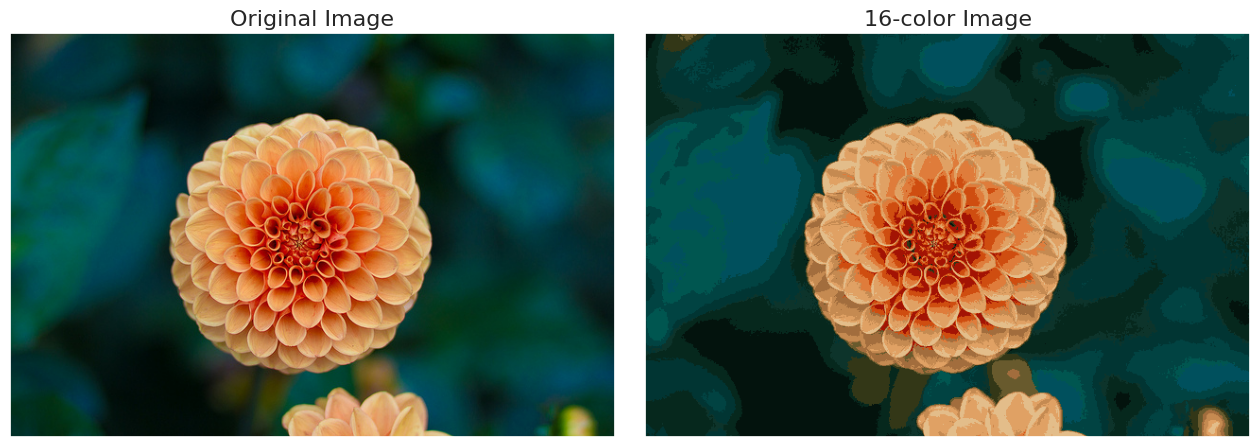

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler # Import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X) # Use StandardScaler to scale the data

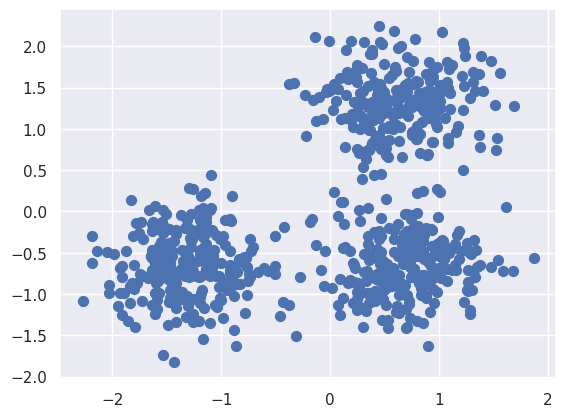

In [ ]:
import matplotlib.pyplot as plt

(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN # Import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Complete the DBSCAN call
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


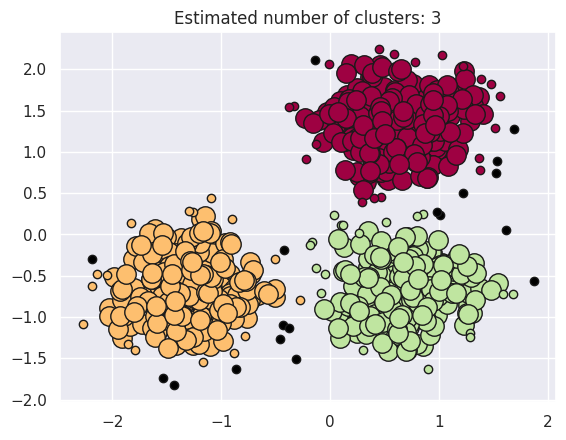

In [ ]:
unique_labels = set(labels)

# Create the mask for core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot( # Added plt.plot
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot( # Added plt.plot
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}") # Added plt.title
plt.show() # Added plt.show()

# Tugas Praktikum


## 1. Tugas K-Means

In [ ]:
tugas = pd.read_csv("/content/drive/MyDrive/Kuliah/csv - csvan/Mall_Customers.csv")
tugas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select the features for clustering, including 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
X_tugas = tugas[['Annual Income (k$)', 'Spending Score (1-100)']]


# Display the first few rows of the prepared data
display(X_tugas.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


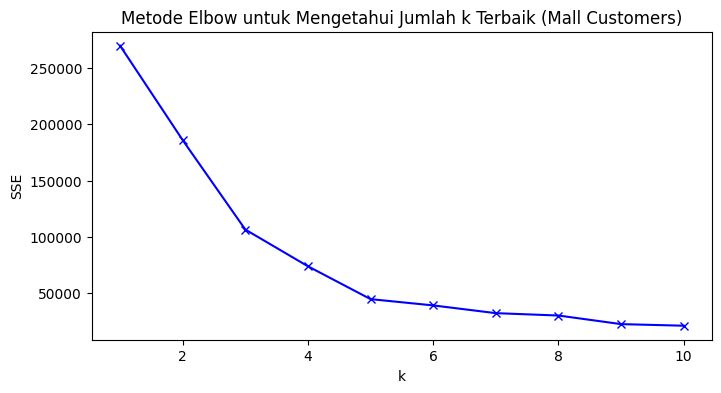

k=1; SSE=269981.28000000014
k=2; SSE=185917.1425392853
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793369
k=6; SSE=38858.959975143895
k=7; SSE=31969.42655023547
k=8; SSE=29858.48359760394
k=9; SSE=22209.851608025536
k=10; SSE=20786.936692059153


In [ ]:
# Cari K optimal dengan elbow dan SSE

# List nilai SSE
sse_tugas = []

K_tugas = range(1, 11)

# Cek nilai SSE setiap k untuk menentukan k
for k in K_tugas:
    kmeanModel_tugas = KMeans(n_clusters=k, random_state=0)
    kmeanModel_tugas.fit(X_tugas)
    sse_tugas.append(kmeanModel_tugas.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_tugas, sse_tugas, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik (Mall Customers)")
plt.show()

# Print SSE values for each k
for idx, sse_val in enumerate(sse_tugas, start=1):
    print(f'k={idx}; SSE={sse_val}')

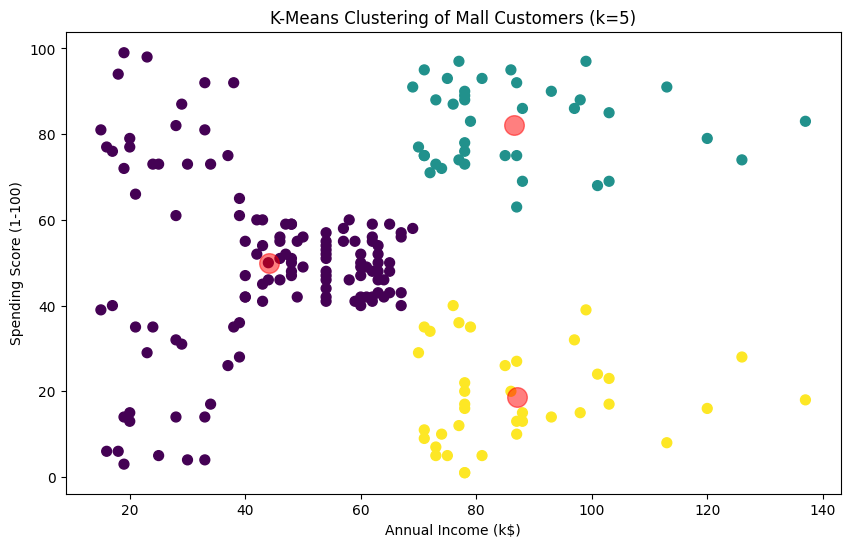

In [ ]:
# visualisasi k = 3
kmeans_tugas = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_tugas.fit(X_tugas)
y_kmeans_tugas = kmeans_tugas.predict(X_tugas)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tugas['Annual Income (k$)'], X_tugas['Spending Score (1-100)'], c=y_kmeans_tugas, s=50, cmap='viridis')

centers_tugas = kmeans_tugas.cluster_centers_
plt.scatter(centers_tugas[:, 0], centers_tugas[:, 1], c='red', s=200, alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers (k=5)')
plt.show()

## DBSCAN


In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Buat dataset make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi dataset
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Display the first few rows of the scaled data
display(X_moons_scaled[:5])

array([[ 1.75081891,  0.48393978],
       [ 1.35606443, -0.90706929],
       [-0.90150442,  1.22470664],
       [-0.60117222, -0.14688373],
       [ 0.0048725 , -1.28700543]])

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_moons = dbscan.fit_predict(X_moons_scaled)

# Hitung jumlah klaster dan noise
n_clusters_moons = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise_moons = list(labels_moons).count(-1)

print(f"Estimated number of clusters (DBSCAN): {n_clusters_moons}")
print(f"Estimated number of noise points (DBSCAN): {n_noise_moons}")

Estimated number of clusters (DBSCAN): 2
Estimated number of noise points (DBSCAN): 0


In [ ]:
from sklearn import metrics

# Evaluasi dengan metrik
print(f"Homogeneity: {metrics.homogeneity_score(y_moons, labels_moons):.3f}")
print(f"Completeness: {metrics.completeness_score(y_moons, labels_moons):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_moons, labels_moons):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_moons, labels_moons):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_moons, labels_moons):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_moons_scaled, labels_moons):.3f}")

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


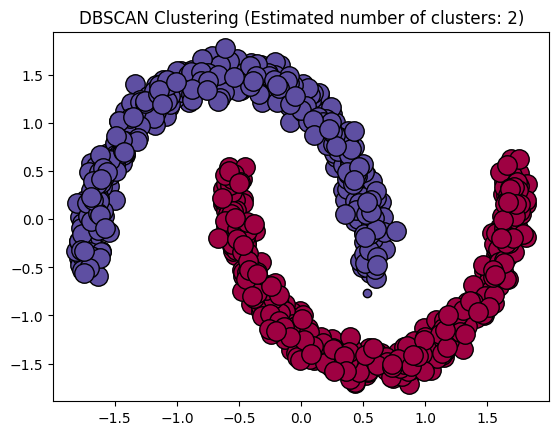

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil DBSCAN
unique_labels_moons = set(labels_moons)

# Create the mask for core samples
core_samples_mask_moons = np.zeros_like(labels_moons, dtype=bool)
core_samples_mask_moons[dbscan.core_sample_indices_] = True

colors_moons = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_moons))]
for k, col in zip(unique_labels_moons, colors_moons):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask_moons = labels_moons == k

    xy_core = X_moons_scaled[class_member_mask_moons & core_samples_mask_moons]
    plt.plot(
        xy_core[:, 0],
        xy_core[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy_non_core = X_moons_scaled[class_member_mask_moons & ~core_samples_mask_moons]
    plt.plot(
        xy_non_core[:, 0],
        xy_non_core[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"DBSCAN Clustering (Estimated number of clusters: {n_clusters_moons})")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import pandas as pd

eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Jalankan DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_moons = dbscan.fit_predict(X_moons_scaled)

        # Hitung jumlah klaster dan noise
        n_clusters_moons = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
        n_noise_moons = list(labels_moons).count(-1)

        row = {
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_moons,
            'n_noise': n_noise_moons,
        }

        # Evaluate with metrics (only if there are more than 1 cluster and not all points are noise)
        if n_clusters_moons > 0 and n_noise_moons < len(X_moons_scaled):
            row['Homogeneity'] = metrics.homogeneity_score(y_moons, labels_moons)
            row['Completeness'] = metrics.completeness_score(y_moons, labels_moons)
            row['V-measure'] = metrics.v_measure_score(y_moons, labels_moons)
            row['Adjusted Rand Index'] = metrics.adjusted_rand_score(y_moons, labels_moons)
            row['Adjusted Mutual Information'] = metrics.adjusted_mutual_info_score(y_moons, labels_moons)
            # Silhouette score requires at least 2 clusters and not all points being noise
            if n_clusters_moons >= 2:
                 row['Silhouette Coefficient'] = metrics.silhouette_score(X_moons_scaled, labels_moons)
            else:
                 row['Silhouette Coefficient'] = 'N/A'
        else:
            row['Homogeneity'] = 'N/A'
            row['Completeness'] = 'N/A'
            row['V-measure'] = 'N/A'
            row['Adjusted Rand Index'] = 'N/A'
            row['Adjusted Mutual Information'] = 'N/A'
            row['Silhouette Coefficient'] = 'N/A'

        results.append(row)

results_df = pd.DataFrame(results)
display(results_df)

,eps,min_samples,n_clusters,n_noise,Homogeneity,Completeness,V-measure,Adjusted Rand Index,Adjusted Mutual Information,Silhouette Coefficient
0,0.05,3,67,197,0.803825,0.154915,0.259767,0.032984,0.246428,0.077967
1,0.05,10,0,1000,N/A,N/A,N/A,N/A,N/A,N/A
2,0.05,20,0,1000,N/A,N/A,N/A,N/A,N/A,N/A
3,0.10,3,3,18,0.983471,0.708395,0.823571,0.854285,0.823246,0.137887
4,0.10,10,9,63,0.938949,0.358282,0.518656,0.435052,0.516899,0.18414
5,0.10,20,6,844,0.157108,0.153385,0.155224,0.010402,0.151519,-0.409118
6,0.30,3,2,0,1.0,1.0,1.0,1.0,1.0,0.391597
7,0.30,10,2,0,1.0,1.0,1.0,1.0,1.0,0.391597
8,0.30,20,2,0,1.0,1.0,1.0,1.0,1.0,0.391597
9,0.50,3,1,0,0.0,1.0,0.0,0.0,0.0,N/A
